In [1]:
# import packages
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import numpy as np
import pandas as pd
import itertools
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import datetime

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

def import_df_results(filepath, real, dT, dP, dCV, demand):
    df_results = pd.read_csv(filepath + 'df_results_P{}T{}_dCV{}_real{}_demand{}.csv'.format(dP,dT,dCV,real,demand))
    df_results['Date'] = pd.to_datetime(df_results['Date'])
    df_results['Month'] = df_results['Date'].dt.month
    df_results['Year'] = df_results['Date'].dt.year
    df_results = df_results.set_index('Date')
    return df_results

# function that takes in a monthly dataframe (make sure the index is the date column) and outputs
# an annually averaged df
def convert_monthly_to_annual_water_yr(df, col_name):
    # set index to date
    #df = df.set_index('Date')
    #print(df)
    # add water year column to df
    df['water_year'] = df.index.year + (df.index.month >= 10)
    
    # get sum of data by water year
    df_water_yr = df.groupby('water_year')[col_name].sum() #mean()
    #df_water_yr = s_water_yr.to_frame()
    df_water_yr['date'] = pd.to_datetime(df_water_yr.index, format='%Y') # add date column
    df_water_yr = df_water_yr.set_index('date')# change date col to index
    return df_water_yr

In [2]:
# get climate scenarios
# input filepath information with results
#filepath =
# get climate scenarios
real_All = [1270, 1956, 1987, 2770, 3449, 3515, 3574, 4211, 4373, 4937]
dT_All = [0]
dP_All = [100]
dCV_All = [1.0]
demand_All = ['Baseline']
climate_scenarios = list(itertools.product(real_All, dT_All, dP_All, dCV_All, demand_All))
col_name = ['Urban_Demand_Prior_Rationing', 'Urban_Water_Supply_Deficit_MGD']
list_annual_data = []
list_df_results = []
# loop through climate scenarios
for combo in climate_scenarios:
    print(combo)
    # get results
    df_results = import_df_results(filepath, combo[0], combo[1], combo[2], combo[3], combo[4])
    
    # get annual demands and unmet demands
    df_annual = convert_monthly_to_annual_water_yr(df_results, col_name)
    df_annual['reliability'] = (df_annual['Urban_Demand_Prior_Rationing']-df_annual['Urban_Water_Supply_Deficit_MGD']) / df_annual['Urban_Demand_Prior_Rationing'] * 100
    
    # add to list
    list_annual_data.append(df_annual)
    list_df_results.append(df_results)


(1270, 0, 100, 1.0, 'Baseline')
(1956, 0, 100, 1.0, 'Baseline')
(1987, 0, 100, 1.0, 'Baseline')
(2770, 0, 100, 1.0, 'Baseline')
(3449, 0, 100, 1.0, 'Baseline')
(3515, 0, 100, 1.0, 'Baseline')
(3574, 0, 100, 1.0, 'Baseline')
(4211, 0, 100, 1.0, 'Baseline')
(4373, 0, 100, 1.0, 'Baseline')
(4937, 0, 100, 1.0, 'Baseline')


(1270, 0, 100, 1.0, 'Baseline')
(1956, 0, 100, 1.0, 'Baseline')
(1987, 0, 100, 1.0, 'Baseline')
(2770, 0, 100, 1.0, 'Baseline')
(3449, 0, 100, 1.0, 'Baseline')
(3515, 0, 100, 1.0, 'Baseline')
(3574, 0, 100, 1.0, 'Baseline')
(4211, 0, 100, 1.0, 'Baseline')
(4373, 0, 100, 1.0, 'Baseline')
(4937, 0, 100, 1.0, 'Baseline')


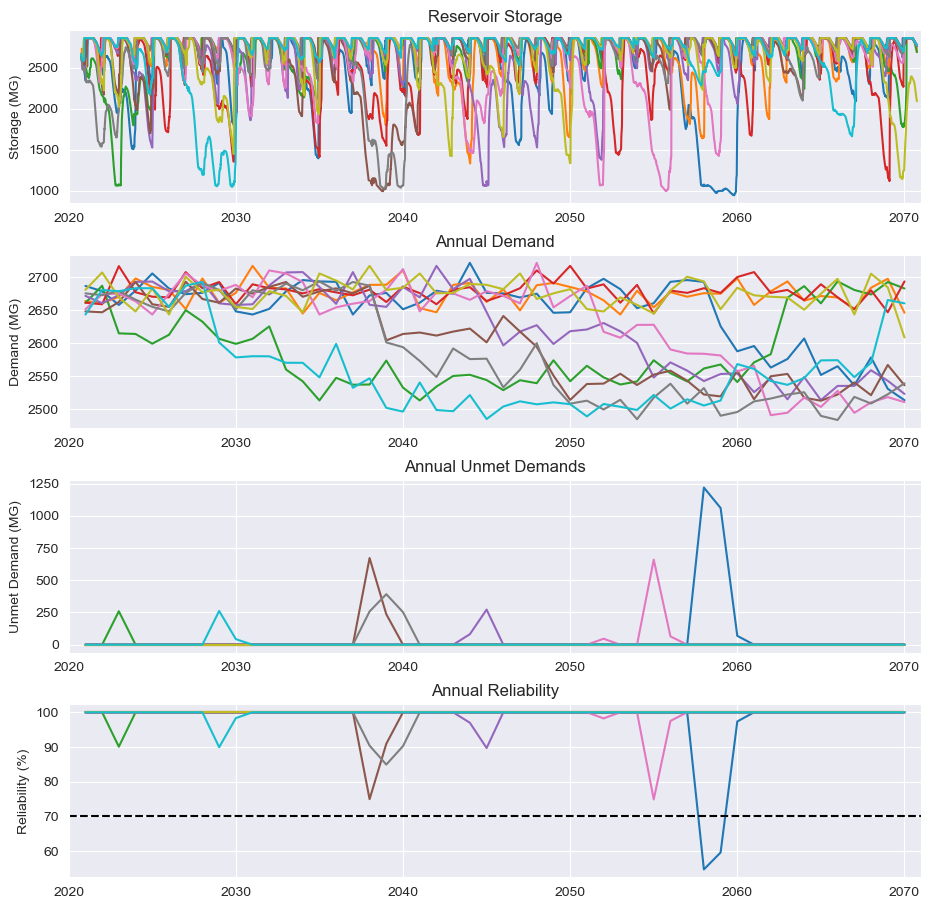

In [4]:
# time series plot-
# panel 1: reservoir levels
# panel 2: urban demand
# panel 3: water supply deficit
# panel 4: reliability

i = 0
fig = plt.figure(figsize = (11,11))
gs = gridspec.GridSpec(4, 1, height_ratios = [1, 1, 1, 1], hspace=0.3)
dates = [datetime.datetime(2020, 1, 1), datetime.datetime(2071, 1, 1)]

# subplot 1: reservoir levels
i = 0
ax00 = fig.add_subplot(gs[0, 0])
col = 'LL_Reservoir_MG'
for combo in climate_scenarios:
    print(combo)
    df_results = list_df_results[i]
    #print(df_annual)
    label = 'real={}, dT={}, dP={}, dCV={}, demand={}'.format(combo[0], combo[1], combo[2], combo[3], combo[4])
    ax00.plot(df_results[col]) #, label=label)
    #ax00.legend(bbox_to_anchor=(1, 1))
    i += 1
ax00.set_ylabel('Storage (MG)')
ax00.set_xlim(dates[0], dates[1])
ax00.set_title('Reservoir Storage')

# subplot 2: urban demand (annual)
i = 0
ax10 = fig.add_subplot(gs[1, 0])
col = 'Urban_Demand_Prior_Rationing'
for combo in climate_scenarios:
    df_annual = list_annual_data[i]
    ax10.plot(df_annual[col])
    i += 1
ax10.set_ylabel('Demand (MG)')
ax10.set_xlim(dates[0], dates[1])
ax10.set_title('Annual Demand')

# subplot 3: unmet demand (annual)
i = 0
ax20 = fig.add_subplot(gs[2, 0])
col = 'Urban_Water_Supply_Deficit_MGD'
for combo in climate_scenarios:
    df_annual = list_annual_data[i]
    ax20.plot(df_annual[col])
    i += 1
ax20.set_ylabel('Unmet Demand (MG)')
ax20.set_xlim(dates[0], dates[1])
ax20.set_title('Annual Unmet Demands')

# subplot 4: reliability (annual %)
i = 0
ax30 = fig.add_subplot(gs[3, 0])
col = 'reliability'
for combo in climate_scenarios:
    df_annual = list_annual_data[i]
    ax30.plot(df_annual[col])
    i += 1
ax30.set_ylabel('Reliability (%)')
ax30.set_xlim(dates[0], dates[1])
ax30.plot([dates[0], dates[1]], [70, 70], linestyle='--', color='k', linewidth=1.5)
ax30.set_title('Annual Reliability')
plt.savefig('../../outputs/timeseries_baseline_policy.png', dpi=300, bbox_inches='tight')
plt.show()